## Analysis of model

Here I produce the plots that were necessary for this analysis. It takes quite some time to run but it shows the histogram of the error and also the zenith distribution. It also produces predicted values using the model that was best up till now. 

In [1]:
import numpy as np

In [2]:
import pandas as pd
import sys,os

In [3]:
def load_files(batch):
    images = []
    labels = []
    for i in batch:
        print('Loading File: ' + i)
        x = np.load(i).item()
        keys = x.keys()
        for key in keys:
            images.append(x[key][0])
            labels.append(x[key][1])
    return np.array(images),np.array(labels)

def get_zenith(labels):
    zenith_values = []
    for i in labels:
        zenith_values.append(i[1])
    zenith_values = np.array(zenith_values)
    return zenith_values

In [4]:
output_best = 'test_best4.h5'
file_path = '/fs/scratch/PAS1495/amedina/'
y = os.listdir(file_path+'processed_new')

file_names = []

for i in y:
    file_names.append(file_path+'processed_new/'+i)

file_names_batched = list(np.array_split(file_names,5))

In [5]:
images,labels = load_files(file_names_batched[4][0:200])

zenith_values = get_zenith(labels)

Loading File: /fs/scratch/PAS1495/amedina/processed_new/images_2437.npy
Loading File: /fs/scratch/PAS1495/amedina/processed_new/images_2128.npy
Loading File: /fs/scratch/PAS1495/amedina/processed_new/images_2922.npy
Loading File: /fs/scratch/PAS1495/amedina/processed_new/images_3648.npy
Loading File: /fs/scratch/PAS1495/amedina/processed_new/images_4774.npy
Loading File: /fs/scratch/PAS1495/amedina/processed_new/images_67.npy
Loading File: /fs/scratch/PAS1495/amedina/processed_new/images_3786.npy
Loading File: /fs/scratch/PAS1495/amedina/processed_new/images_1949.npy
Loading File: /fs/scratch/PAS1495/amedina/processed_new/images_4297.npy
Loading File: /fs/scratch/PAS1495/amedina/processed_new/images_5086.npy
Loading File: /fs/scratch/PAS1495/amedina/processed_new/images_1870.npy
Loading File: /fs/scratch/PAS1495/amedina/processed_new/images_218.npy
Loading File: /fs/scratch/PAS1495/amedina/processed_new/images_99.npy
Loading File: /fs/scratch/PAS1495/amedina/processed_new/images_1982.n

Loading File: /fs/scratch/PAS1495/amedina/processed_new/images_6439.npy
Loading File: /fs/scratch/PAS1495/amedina/processed_new/images_850.npy
Loading File: /fs/scratch/PAS1495/amedina/processed_new/images_4874.npy
Loading File: /fs/scratch/PAS1495/amedina/processed_new/images_6824.npy
Loading File: /fs/scratch/PAS1495/amedina/processed_new/images_1093.npy
Loading File: /fs/scratch/PAS1495/amedina/processed_new/images_799.npy
Loading File: /fs/scratch/PAS1495/amedina/processed_new/images_3502.npy
Loading File: /fs/scratch/PAS1495/amedina/processed_new/images_1783.npy
Loading File: /fs/scratch/PAS1495/amedina/processed_new/images_3864.npy
Loading File: /fs/scratch/PAS1495/amedina/processed_new/images_682.npy
Loading File: /fs/scratch/PAS1495/amedina/processed_new/images_345.npy
Loading File: /fs/scratch/PAS1495/amedina/processed_new/images_5411.npy
Loading File: /fs/scratch/PAS1495/amedina/processed_new/images_5650.npy
Loading File: /fs/scratch/PAS1495/amedina/processed_new/images_340.n

In [6]:
from keras.models import load_model

Using TensorFlow backend.


In [7]:
def predict_images(model_name,images):
    model = load_model(model_name)
    predicted_zenith = model.predict(images)
    return predicted_zenith

In [8]:
images = images.reshape([images.shape[0],images.shape[1],images.shape[2],1])
zenith_1 = predict_images('/users/PAS1495/amedina/work/project/script/Network/'+output_best,images)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [9]:
true_energy = []
for i in labels:
    true_energy.append(i[0])
delta_zenith1 = list([abs(i-j) for i,j in zip(zenith_1,np.cos(zenith_values))])
true_energy_1 = [np.log10(x) for x in true_energy]

In [28]:
import matplotlib.pylab as plt
import matplotlib

def plot_zenith(figure_number,x,y,plot_name):
    plt.figure(figure_number)
    plt.hist2d(x,y,
               bins=100,
               norm=matplotlib.colors.LogNorm())
    #plt.xscale('log')
    plt.colorbar()
    plt.xlabel('Energy (GeV)')
    plt.ylabel('Zenith Error (Rad)')
    plt.savefig(plot_name)

## Energy Distribution

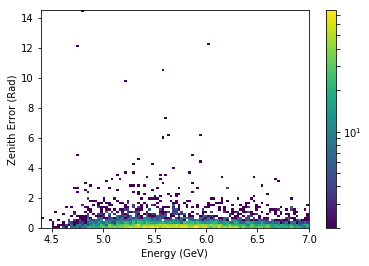

In [30]:
zenith_plotting = zip(delta_zenith1,zenith_values)
zenith_plot = [i[0]/np.sin(j) for i,j in zenith_plotting]
plot_zenith(1,true_energy_1,zenith_plot,'final_heat_3.png')

## Zenith Distribution

8606
8606


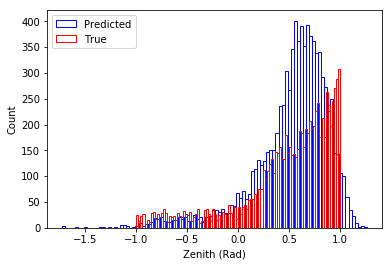

In [31]:
plt.figure(5)
plt.hist(zenith_1,bins=100,label='Predicted',edgecolor='blue', facecolor="None")
plt.hist(np.cos(zenith_values),bins=100,label='True',edgecolor='red', facecolor="None")
plt.xlabel('Zenith (Rad)')
plt.ylabel('Count')
plt.legend()
plt.savefig('Histogram_3.png')
print(len(zenith_1))
print(len(zenith_values))

## Zenith Error Distribution

In [ ]:
plt.figure(6)
plt.hist(zenith_plot,bins=1000)
plt.xlabel('Zenith Error (Rad)')
plt.ylabel('Count')
plt.xlim(0,2)
plt.savefig('Zenith_error_hist_3.png')

In [14]:
mean_square = [((i)**2.0) for i in delta_zenith1]
print((sum(mean_square)/len(mean_square)))

[0.07038142]


## Conclusions

The mean squared error being 11.3 shows that we have quite a bit to go before we can actually use this model